In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#### Uplading the data 

In [3]:
data=pd.read_csv('C:/Data Science/Uber_raw_2019.csv')

In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,09-01-2019 00:01,40.2201,-74.0021,B02512
1,09-01-2019 00:01,40.7500,-74.0027,B02512
2,09-01-2019 00:03,40.7559,-73.9864,B02512
3,09-01-2019 00:06,40.7450,-73.9889,B02512
4,09-01-2019 00:11,40.8145,-73.9444,B02512


In [5]:
#### Preprocessing the data

In [6]:
def pre_processing (data):
    columns=data.shape[1]
    print("Total number of columns are : ",columns)
    rows=data.shape[0]
    print('Total number of raws are : ',rows)
    missing_num=data.isnull().sum()
    print('Total missing values in data are : ',missing_num)
    duplicate=data.duplicated().sum()
    print('Total number of duplicates values are : ',duplicate)
    return(data)
    

In [7]:
pre_processing(data)

Total number of columns are :  4
Total number of raws are :  409565
Total missing values in data are :  Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64
Total number of duplicates values are :  8735


,Date/Time,Lat,Lon,Base
0,09-01-2019 00:01,40.2201,-74.0021,B02512
1,09-01-2019 00:01,40.7500,-74.0027,B02512
2,09-01-2019 00:03,40.7559,-73.9864,B02512
3,09-01-2019 00:06,40.7450,-73.9889,B02512
4,09-01-2019 00:11,40.8145,-73.9444,B02512
...,...,...,...,...
409560,09-12-2019 23:59,40.7558,-73.9172,B02764
409561,09-12-2019 23:59,40.7487,-73.9930,B02764
409562,09-12-2019 23:59,40.7253,-73.9955,B02764
409563,09-12-2019 23:59,40.7228,-73.9853,B02764


In [8]:
#### EDA Exploratory data analysis
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [9]:
#### date/time has object datatpe, need to change to datetime datatype for analysis


In [10]:
data['date/time']=data['Date/Time'].map(pd.to_datetime)

In [11]:
data

,Date/Time,Lat,Lon,Base,date/time
0,09-01-2019 00:01,40.2201,-74.0021,B02512,2019-09-01 00:01:00
1,09-01-2019 00:01,40.7500,-74.0027,B02512,2019-09-01 00:01:00
2,09-01-2019 00:03,40.7559,-73.9864,B02512,2019-09-01 00:03:00
3,09-01-2019 00:06,40.7450,-73.9889,B02512,2019-09-01 00:06:00
4,09-01-2019 00:11,40.8145,-73.9444,B02512,2019-09-01 00:11:00
...,...,...,...,...,...
409560,09-12-2019 23:59,40.7558,-73.9172,B02764,2019-09-12 23:59:00
409561,09-12-2019 23:59,40.7487,-73.9930,B02764,2019-09-12 23:59:00
409562,09-12-2019 23:59,40.7253,-73.9955,B02764,2019-09-12 23:59:00
409563,09-12-2019 23:59,40.7228,-73.9853,B02764,2019-09-12 23:59:00


In [12]:
#### Extract the day, weekday & hour from data for visual analysis
### here we use lambda function of python instead of dt. function

In [13]:
data['day']=data['date/time'].apply(lambda x:x.day)
data['hour']=data['date/time'].apply(lambda x:x.hour)
data['weekday']=data['date/time'].apply(lambda x:x.weekday())
data['day_name']=data['date/time'].apply(lambda x:x.day_name())
data['month']=data['date/time'].apply(lambda x:x.month)
data['year']=data['date/time'].apply(lambda x:x.year)

In [14]:
##### from above we conclude that the dats is of month of september 2019

<Figure size 864x720 with 0 Axes>

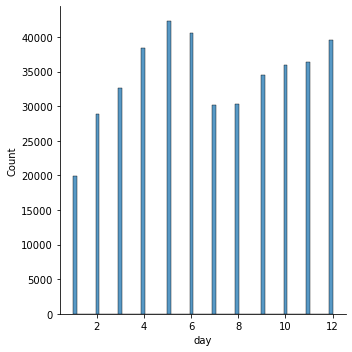

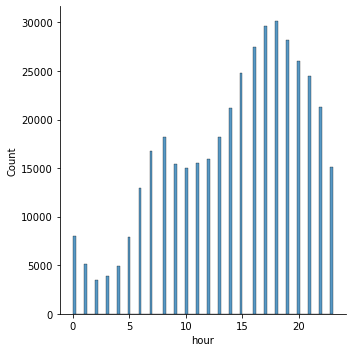

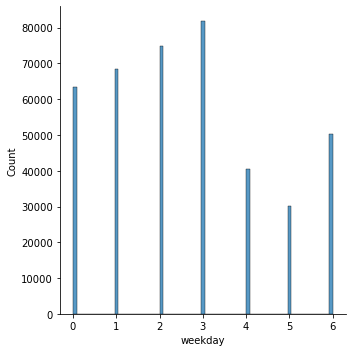

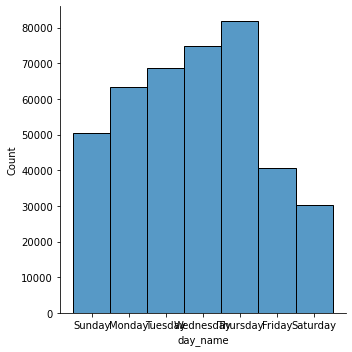

In [15]:
plt.figure(figsize=(12,10))
sns.displot(x=data['day'])
sns.displot(x=data['hour'])
sns.displot(x=data['weekday'])
sns.displot(x=data['day_name'])

<AxesSubplot:xlabel='Lat', ylabel='Lon'>

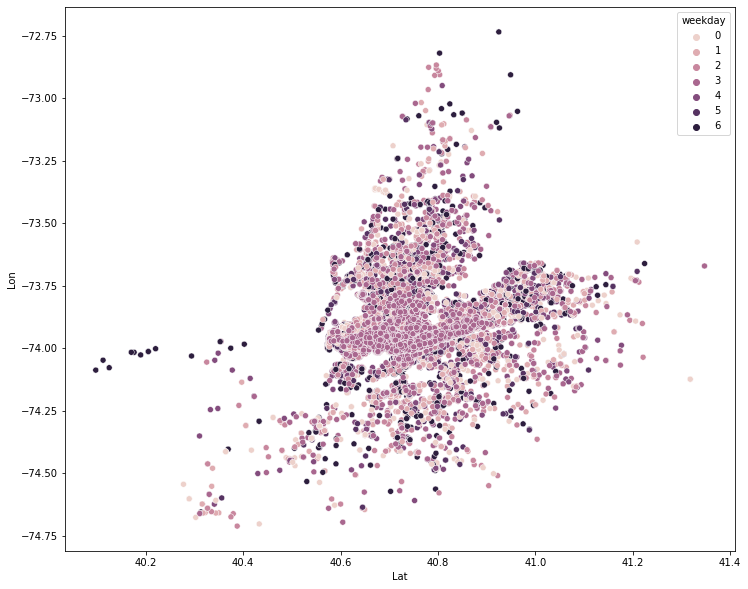

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Lat',y='Lon', hue='weekday',data=data)

In [17]:
data.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [18]:
data.groupby(['weekday','hour']).size()

weekday  hour
0        0        521
         1        305
         2        230
         3        535
         4        925
                 ... 
6        19      3222
         20      3004
         21      2542
         22      1935
         23      1098
Length: 168, dtype: int64

In [19]:
a=data.groupby(['weekday','hour']).size().reset_index()

In [20]:
a

,weekday,hour,0
0,0,0,521
1,0,1,305
2,0,2,230
3,0,3,535
4,0,4,925
...,...,...,...
163,6,19,3222
164,6,20,3004
165,6,21,2542
166,6,22,1935


In [21]:
a.rename(columns={0:'trip'},inplace=True)

In [22]:
a

,weekday,hour,trip
0,0,0,521
1,0,1,305
2,0,2,230
3,0,3,535
4,0,4,925
...,...,...,...
163,6,19,3222
164,6,20,3004
165,6,21,2542
166,6,22,1935


In [23]:
a.corr()

,weekday,hour,trip
weekday,1.000000e+00,-3.054975e-18,-0.295255
hour,-3.054975e-18,1.000000e+00,0.647632
trip,-2.952554e-01,6.476319e-01,1.000000


<AxesSubplot:>

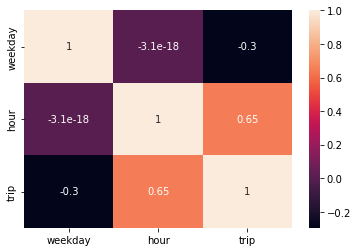

In [24]:
sns.heatmap(a.corr(),annot=True)